# Introduction
The code aims to perform polynomial regression on a dataset representing the relationship between input size and execution time. Polynomial regression is used to model nonlinear relationships between variables. In this case, we'll use the data from `solution_us14.csv` to predict execution time based on input size. The degree of the polynomial is set to 2 as an example, but it can be adjusted depending on the complexity of the relationship.


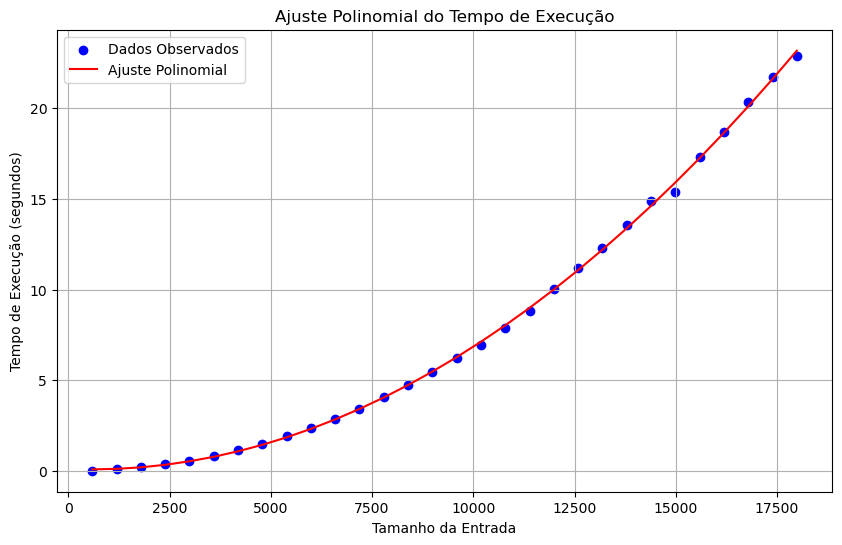

Coeficientes da Regressão Polinomial: [ 0.00000000e+00 -8.70860532e-05  7.60279067e-08]
Erro Médio Quadrático: 0.022761717007143138


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('solution_us14.csv', delimiter=';')

data['size'] = data['size'].astype(str).str.replace(',', '.').astype(float)
data['time'] = data['time'].astype(str).str.replace(',', '.').astype(float)

X = data[['size']]
y = data['time']

poly = PolynomialFeatures(degree=2)  # Ajuste de grau 2 como exemplo
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X, y_pred, color='red', label='Ajuste Polinomial')
plt.xlabel('Tamanho da Entrada')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Ajuste Polinomial do Tempo de Execução')
plt.legend()
plt.grid(True)
plt.show()

print(f'Coeficientes da Regressão Polinomial: {model.coef_}')
print(f'Erro Médio Quadrático: {mse}')
